In [149]:
import numpy as np
import pandas as pd 
import warnings 
warnings.simplefilter('ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

In [150]:
data = sm.datasets.sunspots.load_pandas()
df = data.data
df

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


In [151]:
df.index = pd.Index(sm.tsa.datetools.dates_from_range("1700", "2008"))
df.index.freq = df.index.inferred_freq
del df["YEAR"]


In [152]:
df

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0
...,...
2004-12-31,40.4
2005-12-31,29.8
2006-12-31,15.2
2007-12-31,7.5


<Axes: >

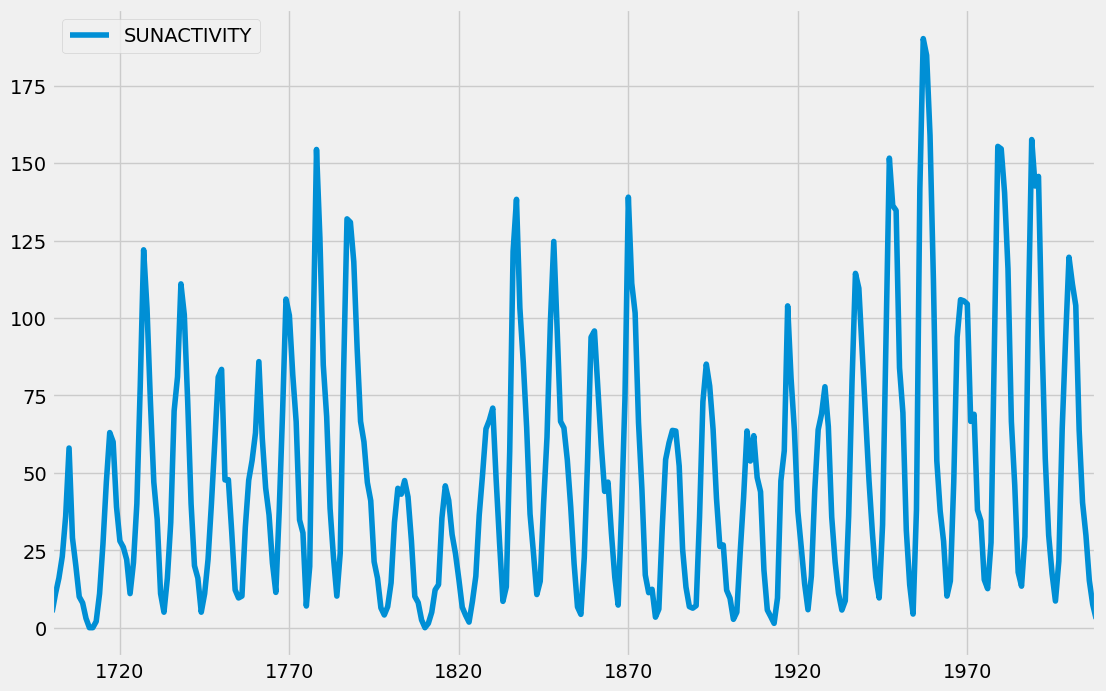

In [153]:
df.plot(figsize=(12, 8))

In [154]:
# X,y=df.YEAR, df.SUNACTIVITY

In [155]:
# plt.plot(X,y)
# plt.show

In [156]:
# Визначення p, d і q у діапазоні 0-2
p = d = q = range(0, 2)
# Генеруємо різні комбінації p, q и q
pdq = list(itertools.product(p, d, q))
# Генеруємо комбінації різних сезонних параметрів p, q и q
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] 
print('Приклади комбінацій параметрів для сезонних ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Приклади комбінацій параметрів для сезонних ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [157]:
# warnings.filterwarnings("ignore") # Вимикаємо попередження
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
            order=param,
            seasonal_order=param_seasonal,
            enforce_stationarity=False,
            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3439.710598624912
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3155.618267417888
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3049.1506172991085
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2931.525990007336
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3033.780146812068
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3026.4798616469875
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2942.7951482313892
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2886.637132306207
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3096.1208215078327
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2861.64460183585
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2811.1324777456393
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2678.6397467991073
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2793.0259964972997
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2786.6289655335113
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2713.799398174938
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2642.560831315349
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2824.8598075257105
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2701.1642233127
ARIM

 обираємо найменше значення AIC - показника найефективнішої комбінаціі гіперпараметрів

In [177]:
mod = sm.tsa.statespace.SARIMAX(y, 
                                order=(1, 0, 1), 
                                seasonal_order=(1, 1, 1, 12), 
                                enforce_stationarity=False, 
                                enforce_invertibility=False)
results = mod.fit()

In [159]:
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7025      0.057     12.281      0.000       0.590       0.815
ma.L1          0.5017      0.057      8.780      0.000       0.390       0.614
ar.S.L12       0.2073      0.072      2.891      0.004       0.067       0.348
ma.S.L12      -1.0000      0.069    -14.510      0.000      -1.135      -0.865
sigma2       361.6977      0.000    1.9e+06      0.000     361.697     361.698


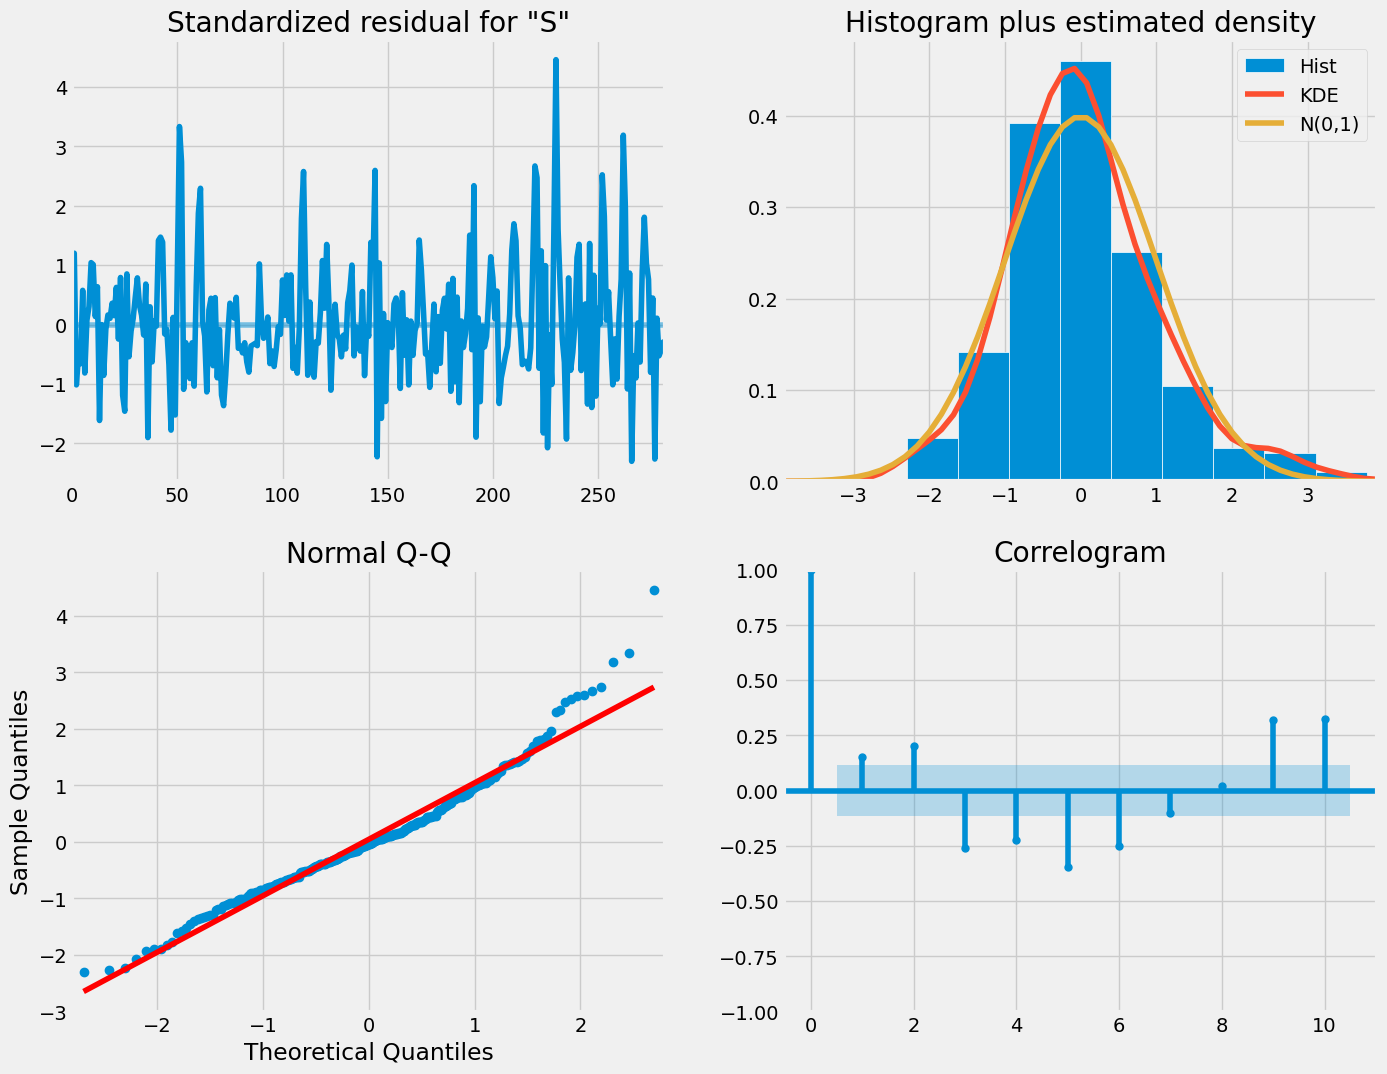

In [160]:
results.plot_diagnostics(figsize=(15,12))
plt.show()

In [186]:
# Отримуємо прогноз на 20 років у перед
pred_uc = results.get_forecast(steps=20)
# Отримуємо інтервал прогнозу
pred_ci = pred_uc.conf_int()
pred_ci

,lower SUNACTIVITY,upper SUNACTIVITY
309,-28.616914,47.463861
310,-35.758095,83.315796
311,-33.180783,102.132308
312,-22.162660,120.469791
313,-16.164441,129.952531
314,-9.939005,137.865118
315,-12.144960,136.482259
316,-15.282017,133.748269
317,-20.096767,129.130941
318,-28.550152,120.773813


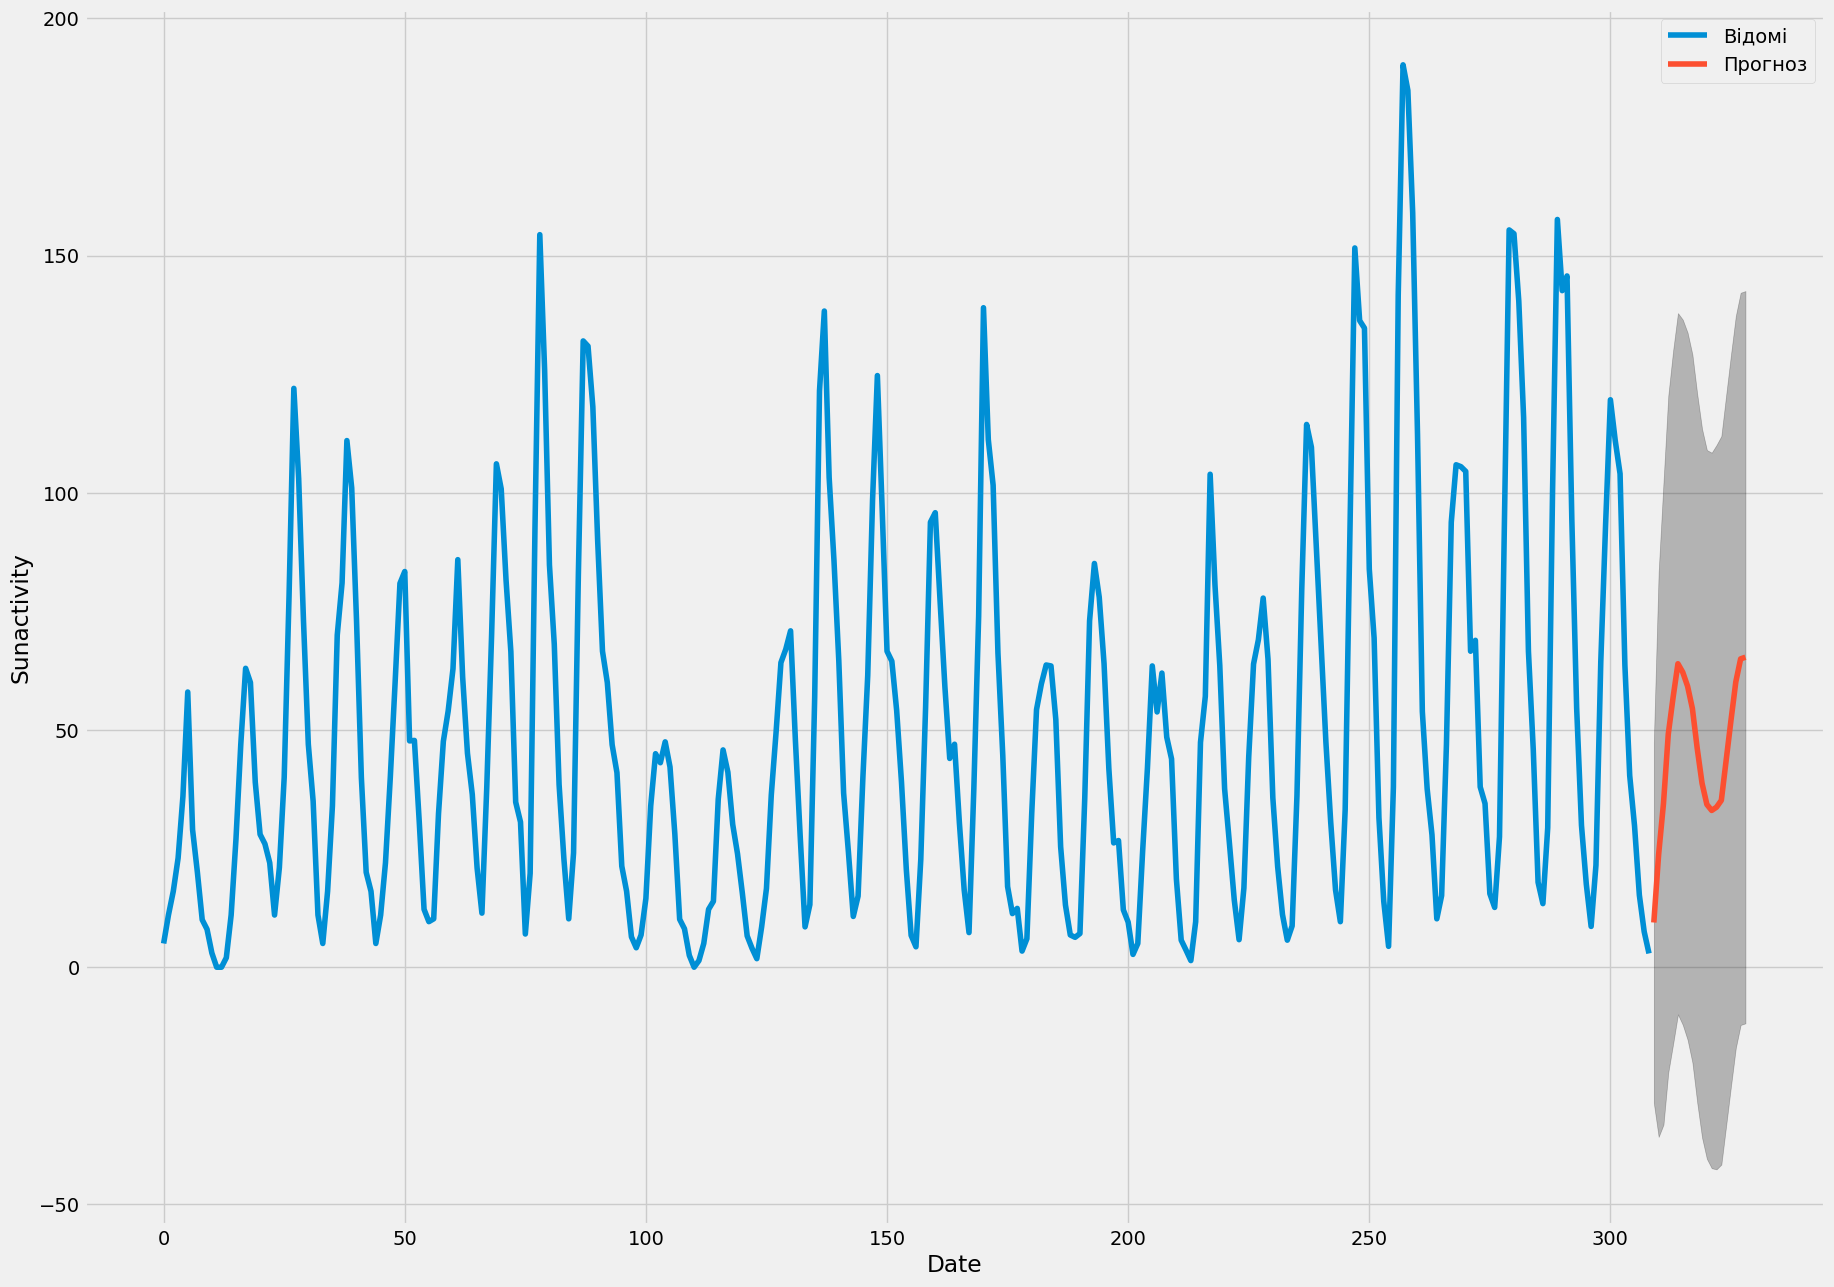

In [187]:
ax = y.plot(label='Відомі', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Прогноз')
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sunactivity')
plt.legend()
plt.show()